### Capital Asset Pricing Model (CAPM)

In [1]:
from scipy import stats

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero.
    stderr : float
        Standard error of the estimated gradient.
    
    See also
    --------
    :func:`scipy.optimize.curve_fit` : Use 

In [3]:
import pandas as pd

In [4]:
import pandas_datareader as web

In [5]:
spy_etf = web.DataReader('SPY','google')

In [7]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-11-09 to 2017-11-07
Data columns (total 5 columns):
Open      250 non-null float64
High      250 non-null float64
Low       250 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [12]:
spy_etf.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-01,258.04,258.43,257.07,257.49,54202736
2017-11-02,257.41,257.75,256.19,257.59,56449535
2017-11-03,257.77,258.50,257.30,258.45,59589730
2017-11-06,258.30,259.00,258.22,258.85,49652598
2017-11-07,258.97,259.35,258.09,258.67,56673454


In [13]:
start = pd.to_datetime('2016-11-09')
end = pd.to_datetime('2017-11-07')

In [14]:
aapl = web.DataReader('AAPL','google',start,end)

In [15]:
aapl.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-11-09,109.88,111.32,108.05,110.88,59176361
2016-11-10,111.09,111.09,105.83,107.79,57134541
2016-11-11,107.12,108.87,106.55,108.43,34143898
2016-11-14,107.71,107.81,104.08,105.71,51175504
2016-11-15,106.57,107.68,106.16,107.11,32264510


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

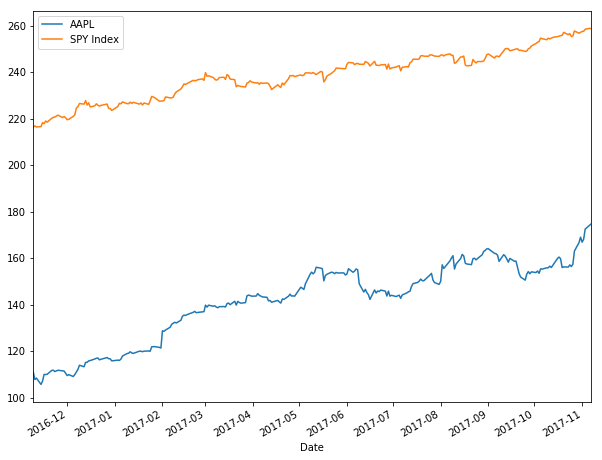

In [18]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend();

In [19]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

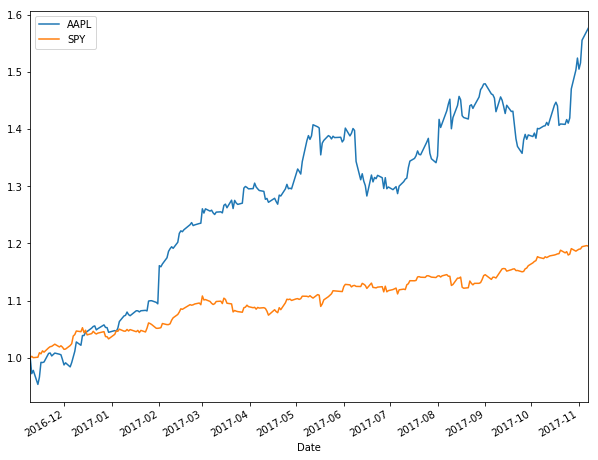

In [20]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [21]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

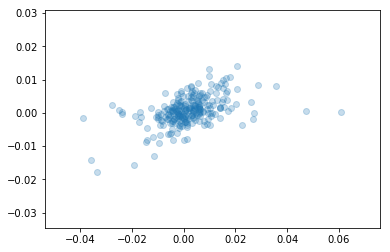

In [23]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.25);

In [24]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],
                                                     spy_etf['Daily Return'].iloc[1:])

In [25]:
# Beta Value
beta

0.19060707354881121

In [28]:
# Alpha Return
alpha

0.00036473879625178416

In [29]:
# R Squared Value
r_value

0.48469923010468091

If you had a stock that performed almost exactly like the market, the beta value would be much higher.

In [30]:
spy_etf['Daily Return'].head()

Date
2016-11-09         NaN
2016-11-10    0.002496
2016-11-11   -0.002305
2016-11-14    0.000786
2016-11-15    0.007803
Name: Daily Return, dtype: float64

In [31]:
import numpy as np

In [32]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [38]:
noise

array([ -5.05617578e-04,   1.64474881e-04,   9.16748716e-04,
        -6.05899958e-05,  -2.03046512e-03,  -9.42382693e-04,
         2.38647750e-04,  -4.09276994e-04,   5.55397602e-04,
         1.82823018e-03,   1.31839634e-03,   1.29478119e-03,
        -1.18979603e-03,  -1.18283574e-03,   9.73538845e-04,
        -7.61712947e-04,  -3.42906155e-06,   1.19003291e-03,
        -9.82629710e-04,   1.20630281e-03,  -1.63019239e-03,
        -1.15834201e-03,  -5.62144862e-04,  -6.21733568e-05,
        -8.15121412e-04,  -7.76084182e-04,  -2.53885350e-04,
        -6.44030565e-04,  -1.56818574e-03,  -7.85232018e-04,
         7.12205539e-05,   1.18137600e-03,  -6.56329704e-04,
        -4.60470672e-04,   2.13789592e-03,   1.88220126e-03,
         1.60854816e-03,   2.39893958e-04,  -1.69970186e-03,
        -1.60920013e-04,   8.29431937e-04,  -2.08670304e-04,
        -1.74466410e-03,   1.40732604e-03,   1.02266736e-03,
         6.21014978e-04,  -7.76461581e-04,   1.68317135e-03,
         1.29882715e-03,

In [35]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

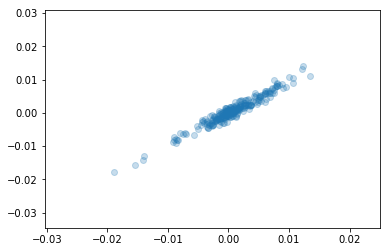

In [36]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha=0.25)

We've generated some fake stock data to ensure CAPM is working property. We should expect a very high beta value now...

In [39]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,
                                                     spy_etf['Daily Return'].iloc[1:])

In [40]:
beta

0.93574275991966538

Note that the beta value is almost 1.

In [41]:
alpha

2.3409217561389212e-05

Also note that our alpha value is incredibly small.